In [1]:
import os
import seaborn as sns
path = '/Users/connormcdonald/Desktop/Masters/MIT807/Gartner Repository/Analysis/Figures'
import sys
sys.path.insert(1, '/Users/connormcdonald/Desktop/Masters/MIT807/Gartner Repository/Data Collection')
from configs import *
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# from mpl_toolkits.axisartist.axislines import SubplotZero
# from pylab import text
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "lualatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

from sqlalchemy import create_engine

engine = create_engine('mysql+mysqlconnector://'+user+':'+passwd+'@'+ip+':3306/'+schema1)

In [2]:
stmt = '''SELECT DATE_FORMAT(date, \'%Y-%m\') as date, 
COUNT(1) AS tweets FROM social.five_g_only
WHERE date < \'2019-02-01\'
group by DATE_FORMAT(date, \'%Y-%m\') 
ORDER BY DATE_FORMAT(date, \'%Y-%m\') ASC'''

df = pd.read_sql(stmt, con=engine)

In [3]:
year = ['2010-01-01', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31']
papers = [471,585, 881, 921, 874, 1365, 2024, 3225, 4740, 6857, 9050, 9579, 12018]

df['date']  = pd.to_datetime(df['date'])
year = pd.to_datetime(year)

In [4]:
import matplotlib.dates as mdates

degree = 3
y = np.array(df['tweets'].to_list())
X = np.array(mdates.date2num(df['date']))
date_index = []
idx = 0
for i in X:
    date_index.append(idx)
    idx += 1

z = np.polyfit(date_index, y, degree)
f = np.poly1d(z)

df_trend = pd.DataFrame(columns=['X', 'y','d'])
df_trend['X'] = date_index
df_trend['y'] = y
df_trend['d'] = X


z = np.polyfit(df_trend.d, df_trend.y, degree)
model = np.poly1d(z)
results = smf.ols(formula='y ~ model(X)', data=df_trend).fit()


X = mdates.date2num(df['date'])

x_fit = mdates.date2num(df['date'])
y_fit = [model(_x) for _x in x_fit]

df['y_fit_2'] = y_fit

In [5]:
print(results.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &        y         & \textbf{  R-squared:         } &     0.756   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.754   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     332.0   \\
\textbf{Date:}             & Mon, 29 Aug 2022 & \textbf{  Prob (F-statistic):} &  1.40e-34   \\
\textbf{Time:}             &     13:45:04     & \textbf{  Log-Likelihood:    } &   -1230.9   \\
\textbf{No. Observations:} &         109      & \textbf{  AIC:               } &     2466.   \\
\textbf{Df Residuals:}     &         107      & \textbf{  BIC:               } &     2471.   \\
\textbf{Df Model:}         &           1      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

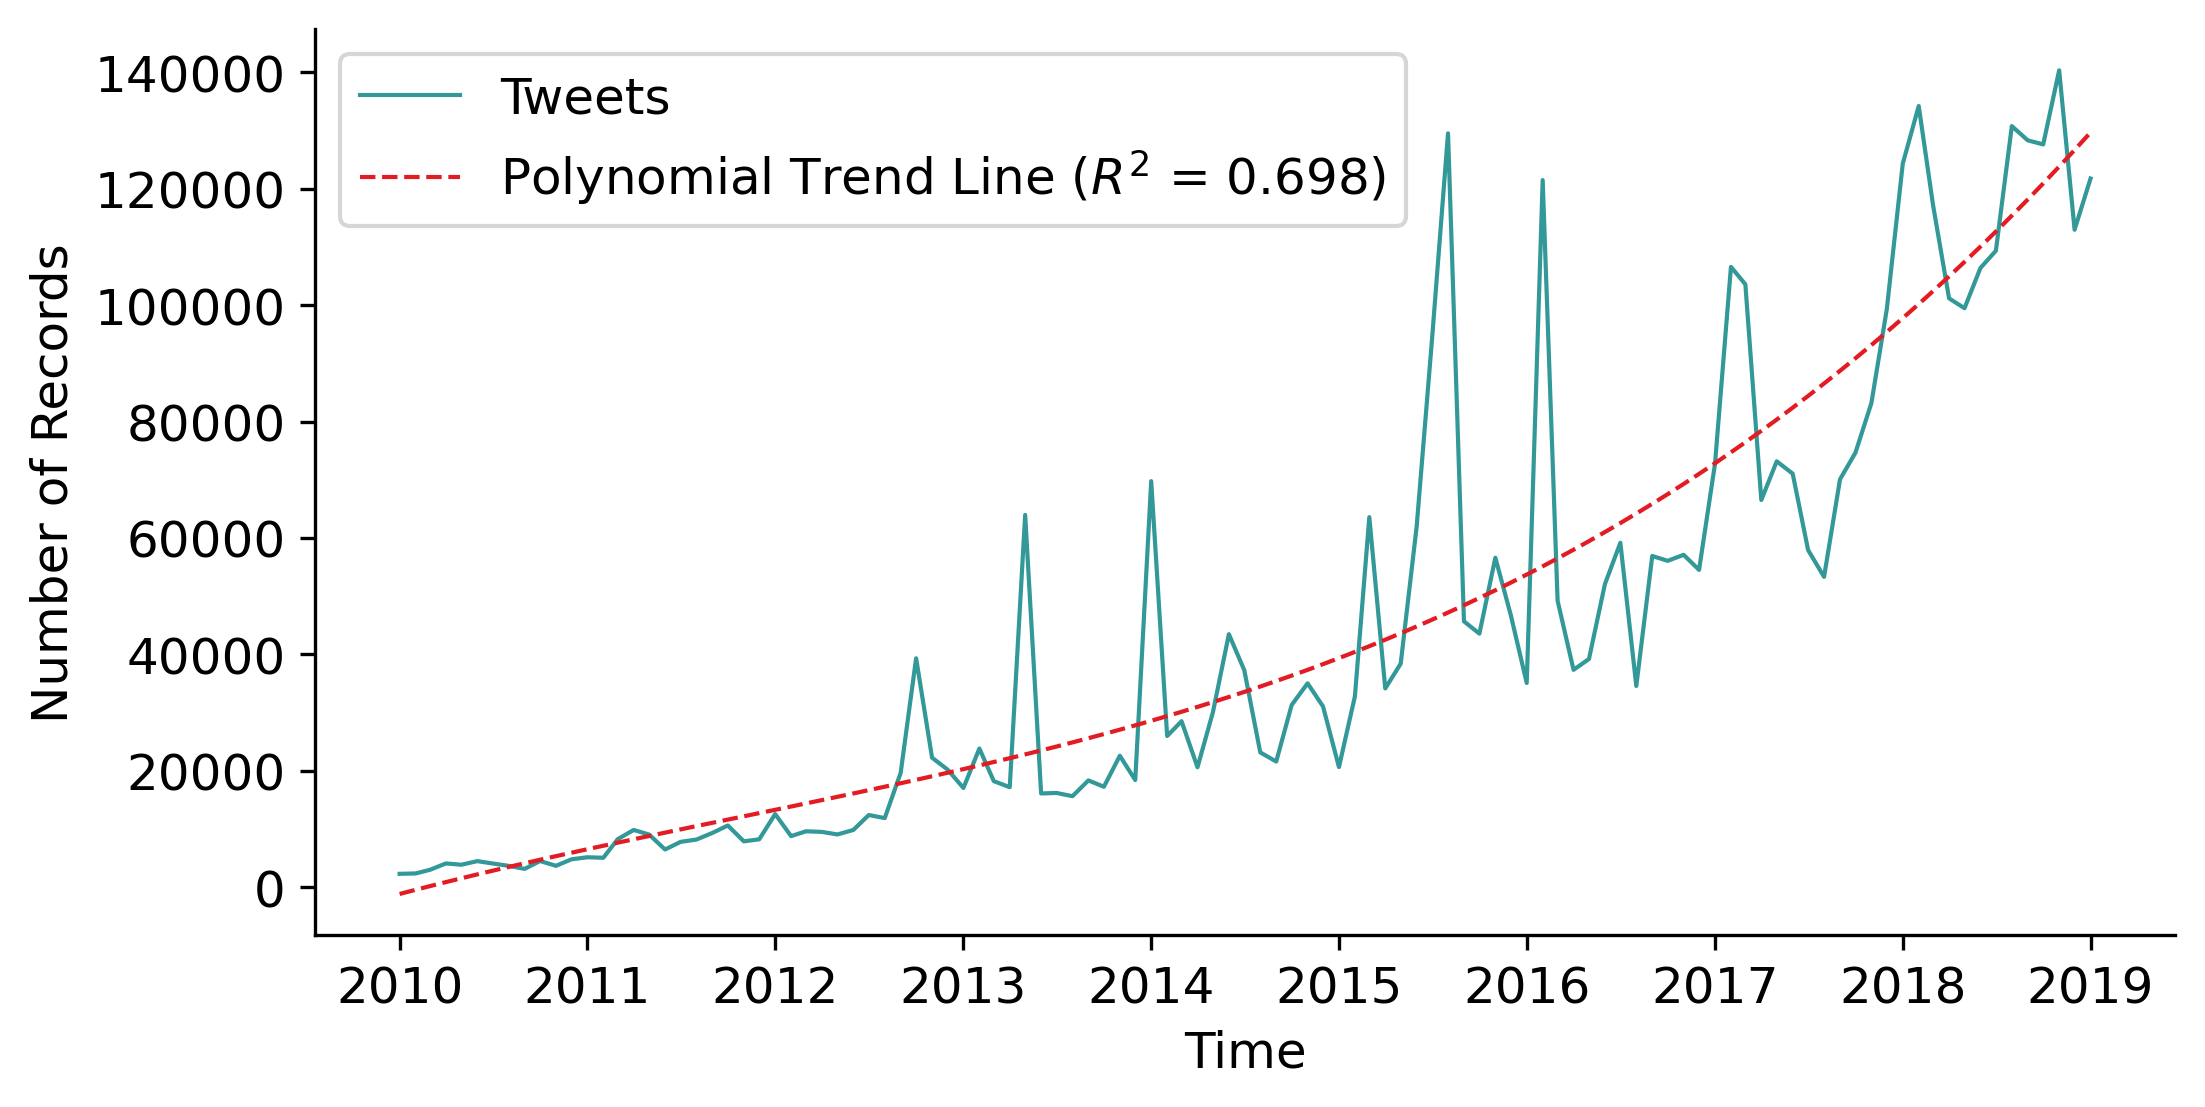

In [7]:
#ML plot
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi'] = 300
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.plot(df['date'], df['tweets'], c = '#339898', linewidth = 1, label='Tweets')
plt.plot(df['date'], df['y_fit_2'], c = '#E31B23', linewidth = 1, linestyle ="--", label= 'Polynomial Trend Line ($R^2$ = 0.756)')
plt.legend()
plt.savefig(os.path.join(path, '5g_data1.pdf'), format='pdf',bbox_inches='tight',pad_inches = 0)
plt.close()

In [6]:
#ML plot
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.dpi'] = 300
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.plot(year, papers, c = '#339898', linewidth = 1, label='Academic Publications')
plt.legend()
plt.savefig(os.path.join(path, '5g_data2.pdf'), format='pdf',bbox_inches='tight',pad_inches = 0)
plt.close()

### we create the hype cycle below:

In [2]:
def create(*x,crest1=50,crest2=25,stp_crest1=0.8,stp_crest2=0.2,midPoint=15,var=10):

    '''
    to create a Story HypeCycle
        x: Input data
        crest1,crest2: Controlling the height of the first wave crest and the second wave crest respectively.
        stp_crest1,stp_crest2: Representing steepness.
        midPoint: The location of the mean value mainly controls the location of the first wave crest.
        var: Displaying moves or penalties for midpoint
        Recommended parameters:crest1=50,crest2=25,stp_crest1=0.8,stp_crest2=0.2,midPoint=15,var=10
        x = np.linspace(0, 50, 5000)
    '''
    x = x
    # If user doesn't submit submit x, it will create a default DataSet.
    if x==():
        x = np.linspace(0, 70, 5000)
    else:
        x=x[0]

    lf_11 = crest1/(1+ np.exp( 1 * stp_crest1 * (x-midPoint-var)))
    lf_12 = crest1/(1+ np.exp( 1 * stp_crest1 * (x-midPoint)))
    lf_13 = crest2/(1+ np.exp( 1 * stp_crest2 * (x-midPoint-var)))
    hype= lf_11- lf_12- lf_13
    return hype

In [3]:
def annotate(*x, x_value = 20, text = "None",color = "red",fontproperties='FZShuTi', fontsize = 13, alpha = 0.8,rotation=3):

    """
     to annaotate the HypeCycle Curve
    """

    x = x
    # If user doesn't submit submit x, it will create a default DataSet.
    if x==():
        x = np.linspace(0, 70, 5000)
    else:
        x=x[0]

    plt.plot(x, create(x), linewidth=3)

    x_val = x_value
    t = text
    c = color
    fp= fontproperties
    fs = fontsize
    a = alpha

    plt.rcParams["figure.figsize"] = [12, 6]
    plt.scatter(x_val, create(x_val), color="blue")
    plt.text(x_val, create(x_val), t ,color=c,fontproperties= fp, fontsize=fs, alpha=a,rotation=rotation)

In [4]:
def visualize(*x, color="black", linewidth=1, linestyle="-"):

    """
     to visualize the HypeCycle Data into a HypeCycle Curve
    """
    x = x
    # If user doesn't submit submit x, it will create a default DataSet.
    if x==():
        x = np.linspace(0, 70, 5000)
    else:
        x=x[0]

    plt.plot(x, create(x), linewidth = linewidth, c = color,linestyle = linestyle, label='Hype Cycle')

    ax.plot(20.2, 30.2,'.', color = '#E31B23') #5g
    ax.plot(14.7, 0,'.', color = '#339898') #private 5g
    ax.plot(16.6, 18.4,'.', color = '#E31B23') #5g
    ax.plot(17.2, 22,'.', color = '#999999') #private 4g
    ax.plot(21.5, 30.2,'.', color = '#FF9A00') #4g
    ax.plot(23, 26.7,'.', color = '#E31B23') #5g

    plt.show()

In [5]:
x = np.linspace(0, 70, 5000)
# matplotlib.rcParams["text.usetex"] = True
plt.rcParams["figure.figsize"] = [8, 4]
plt.xlabel('Time', size = 12)
plt.ylabel('Expectations', size = 12)
plt.rcParams['figure.dpi'] = 300
ax = plt.gca()



ax.annotate('2019',
            xy=(20, 30.4), xycoords='data',
            xytext=(15, 35), textcoords='data',
            size=11,  
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('2020',
            xy=(15, 0), xycoords='data',
            xytext=(16, -7), textcoords='data',
            size=11, 
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left', verticalalignment='top')

ax.annotate('2017',
            xy=(16, 18), xycoords='data',
            xytext=(12, 15), textcoords='data',
            size=11, 
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('2020',
            xy=(16.5, 22), xycoords='data',
            xytext=(12, 22), textcoords='data',
            size=11, 
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

ax.annotate('2011',
            xy=(21.8, 30.4), xycoords='data',
            xytext=(30, 35), textcoords='data',
            size=11,  
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left', verticalalignment='top')

ax.annotate('2020',
            xy=(23.3, 27), xycoords='data',
            xytext=(28, 30), textcoords='data',
            size=11,  
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left', verticalalignment='top')


ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

blue = mpatches.Patch(color='#339898', label='Private 5g')
red = mpatches.Patch(color='#E31B23', label='5g')
green = mpatches.Patch(color='#999999', label='Private 4g')
orange = mpatches.Patch(color='#FF9A00', label='4g')
plt.legend(handles=[blue, red, green, orange])


visualize(x,"blue",8)


plt.savefig(os.path.join(path, 'gartners_hype_cycle_5g.pdf'), format='pdf',bbox_inches='tight',pad_inches = 0)
plt.close()

<ipython-input-4-2eb809bdcaa8>:22: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
